In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
#export preprocessing
soal = pd.read_excel('/content/drive/MyDrive/PER-TA-AN DUNIAWI/Data/42-01/Preprocessing.xlsx')
soal

,Question,Label,Casefold,Tokenize,FreqDist,Stopwords,Stemmed
0,Aktor yang bertanggung jawab atas analisis pre...,C1,aktor yang bertanggung jawab atas analisis pre...,"['aktor', 'yang', 'bertanggung', 'jawab', 'ata...",<FreqDist with 16 samples and 18 outcomes>,"['aktor', 'bertanggung', 'analisis', 'predikti...","['aktor', 'tanggung', 'analisis', 'prediktif',..."
1,Fokusnya terhadap Enterprise/Executive IS adal...,C1,fokusnya terhadap enterprise/executive is adal...,"['fokusnya', 'terhadap', 'enterpriseexecutive'...",<FreqDist with 10 samples and 10 outcomes>,"['fokusnya', 'enterpriseexecutive', 'is', 'sej...","['fokus', 'enterpriseexecutive', 'is', 'sejara..."
2,Sistem pemrosesan transaksi yang secara konsta...,C1,sistem pemrosesan transaksi yang secara konsta...,"['sistem', 'pemrosesan', 'transaksi', 'yang', ...",<FreqDist with 14 samples and 14 outcomes>,"['sistem', 'pemrosesan', 'transaksi', 'konstan...","['sistem', 'pemrosesan', 'transaksi', 'konstan..."
3,Komponen yang dikembangkan oleh Gartner dalam ...,C3,komponen yang dikembangkan oleh gartner dalam ...,"['komponen', 'yang', 'dikembangkan', 'oleh', '...",<FreqDist with 12 samples and 12 outcomes>,"['komponen', 'dikembangkan', 'gartner', 'mengu...","['komponen', 'kembang', 'gartner', 'urai', 're..."
4,Fokus utama pengembangan sistem informasi adal...,C1,fokus utama pengembangan sistem informasi adal...,"['fokus', 'utama', 'pengembangan', 'sistem', '...",<FreqDist with 20 samples and 24 outcomes>,"['fokus', 'utama', 'pengembangan', 'sistem', '...","['fokus', 'utama', 'kembang', 'sistem', 'infor..."
...,...,...,...,...,...,...,...
156,"Dalam three-tier arsitektur data warehouse, ti...",C1,"dalam three-tier arsitektur data warehouse, ti...","['dalam', 'threetier', 'arsitektur', 'data', '...",<FreqDist with 8 samples and 8 outcomes>,"['threetier', 'arsitektur', 'data', 'warehouse...","['threetier', 'arsitektur', 'data', 'warehouse..."
157,Berikut keuntungan data warehouse kecuali...,C3,berikut keuntungan data warehouse kecuali...,"['berikut', 'keuntungan', 'data', 'warehouse',...",<FreqDist with 5 samples and 5 outcomes>,"['keuntungan', 'data', 'warehouse', 'kecuali']","['untung', 'data', 'warehouse', 'kecuali']"
158,classification technique yang teknik pembelaja...,C1,classification technique yang teknik pembelaja...,"['classification', 'technique', 'yang', 'tekni...",<FreqDist with 15 samples and 16 outcomes>,"['classification', 'technique', 'teknik', 'pem...","['classification', 'technique', 'teknik', 'aja..."
159,Hadoop adalah kerangka kerja sumber terbuka un...,C1,hadoop adalah kerangka kerja sumber terbuka un...,"['hadoop', 'adalah', 'kerangka', 'kerja', 'sum...",<FreqDist with 17 samples and 18 outcomes>,"['hadoop', 'kerangka', 'kerja', 'sumber', 'ter...","['hadoop', 'kerangka', 'kerja', 'sumber', 'buk..."


In [ ]:
soal['Label'].value_counts()

C1    114
C3     38
C2      9
Name: Label, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
x = soal['Stemmed'].values.astype('U')
y = soal['Label'].values

In [ ]:
print(x)

["['aktor', 'tanggung', 'analisis', 'prediktif', 'analisis', 'statistik', 'tools', 'analitik', 'canggih', 'algoritmanya']"
 "['fokus', 'enterpriseexecutive', 'is', 'sejarah', 'business', 'inteligent']"
 "['sistem', 'pemrosesan', 'transaksi', 'konstan', 'libat', 'tangan', 'baru', 'basis', 'data', 'operasional']"
 "['komponen', 'kembang', 'gartner', 'urai', 'rencana', 'laksana', 'bi', 'kecuali']"
 "['fokus', 'utama', 'kembang', 'sistem', 'informasi', 'dukung', 'ambil', 'putus', 'fokus', 'sedia', 'lapor', 'struktur', 'kala', 'sejarah', 'business', 'intelligent']"
 "['csf', 'business', 'intelligent']"
 "['csf', 'business', 'intelligence', 'harus', 'cepat', 'terima', 'ubah', 'adaptasi', 'erti']"
 "['sistem', 'dukung', 'putus', 'dss', 'gabung', 'sumber', 'daya', 'intelektual', 'individu', 'mampu', 'komputer', 'tingkat', 'kualitas', 'putus', 'kembang', 'business', 'intelligent']"
 "['type', 'of', 'business', 'analytics']"
 "['istilah', 'tools', 'monitoring', 'analisis', 'kerja']"
 "['istilah'

In [ ]:
LE = LabelEncoder()
y_le = LE.fit_transform(y)

In [ ]:
tfidf = TfidfVectorizer()
x_tf = tfidf.fit_transform(x)

print('Feature Names: ', tfidf.get_feature_names())
print('Penilaian dari TF-IDF:', x_tf)
print('Mapping dari Feature Names ke Penilaian:', tfidf.vocabulary_)

x_tf = x_tf.toarray()

Feature Names:  ['abstraction', 'acu', 'ad', 'adaptasi', 'ajar', 'akses', 'aktor', 'akurat', 'alami', 'alat', 'algoritma', 'algoritmanya', 'alternatif', 'aman', 'ambil', 'analis', 'analisis', 'analitik', 'analitis', 'analytic', 'analytical', 'analytics', 'and', 'anggap', 'angka', 'apa', 'aplikasi', 'application', 'approach', 'architecture', 'area', 'arena', 'arsitektur', 'artefak', 'aspek', 'assessing', 'association', 'atribut', 'atur', 'audiens', 'bagan', 'bagi', 'balanced', 'banding', 'bangun', 'banyak', 'barangbarang', 'baru', 'bas', 'baseline', 'basic', 'basis', 'batas', 'bawa', 'beda', 'beli', 'benar', 'bentuk', 'berisik', 'bersih', 'bertahuntahun', 'bi', 'biaya', 'big', 'bilah', 'bilang', 'bisnis', 'bpm', 'bsc', 'bspecialized', 'buat', 'buka', 'buruk', 'business', 'butuh', 'canggih', 'capai', 'categorical', 'categories', 'category', 'centrality', 'centralized', 'cepat', 'cerita', 'chain', 'challange', 'chart', 'charts', 'ciri', 'class', 'classification', 'closedloop', 'cocok', 'c

In [ ]:
print(Counter(y))
print("------------")

#define oversampling strategy
oversample = SMOTE()

#fit and apply the transform
x_over, y_over = oversample.fit_resample(x_tf, y_le)

#summarize class distribution
print("------------")
print(Counter(y_over))

Counter({'C1': 114, 'C3': 38, 'C2': 9})
------------
------------
Counter({0: 114, 2: 114, 1: 114})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_over)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.21712812 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.12977248 0.         0.        ]]


In [ ]:
print(y_over)

[0 0 0 2 0 2 0 0 2 0 0 2 1 2 2 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2
 2 0 2 0 0 2 0 2 2 1 0 0 1 2 0 1 0 1 2 2 1 0 2 0 2 2 2 0 0 2 2 0 1 2 2 2 2
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 1 0 2 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


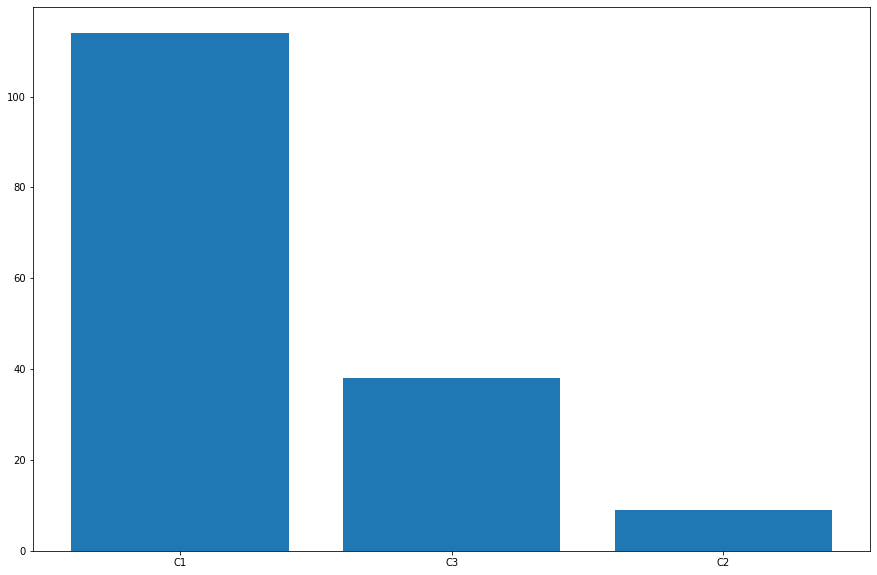

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/sebelum2.png')
plt.show()

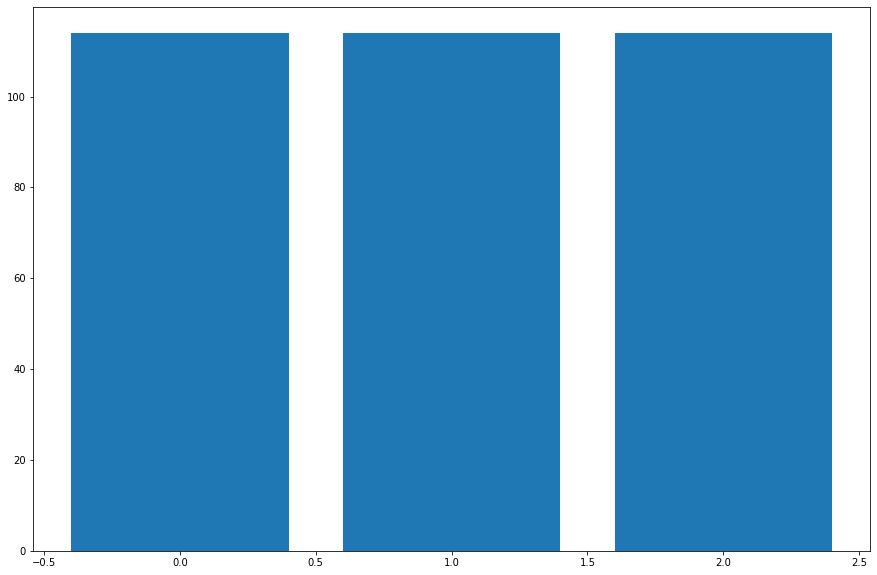

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y_over)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/sesudah2.png')
plt.show()

In [ ]:
pipeline_nb = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', naive_bayes.MultinomialNB()),  
])

In [ ]:
pipeline_svm = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', svm.SVC()),  
])

In [ ]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score_nb = cross_val_score(pipeline_nb, x_over, y_over, cv=cv, scoring='accuracy',n_jobs=-1)
Score_nb

array([0.97142857, 0.85714286, 0.94117647, 0.91176471, 0.94117647,
       0.91176471, 0.91176471, 0.91176471, 0.91176471, 0.94117647])

In [ ]:
print(np.mean(Score_nb))

0.92109243697479


In [ ]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score_svm = cross_val_score(pipeline_svm, x_over, y_over, cv=cv, scoring='accuracy',n_jobs=-1)
Score_svm

array([1.        , 1.        , 0.94117647, 0.91176471, 1.        ,
       0.94117647, 1.        , 0.94117647, 0.97058824, 1.        ])

In [ ]:
print(np.mean(Score_svm))

0.9705882352941175


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
cv = KFold(n_splits=10, random_state=1, shuffle=True)
score_nb = cross_val_predict(pipeline_nb, x_over, y_over, cv=cv)
conf_mat = confusion_matrix(y_over, score_nb)
c_report = classification_report(y_over, score_nb)
print(conf_mat)
print(c_report)
pd.crosstab(y_over, score_nb, rownames=['True'], colnames=['Predicted'], margins=True)

[[ 92   7  15]
 [  0 114   0]
 [  2   3 109]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88       114
           1       0.92      1.00      0.96       114
           2       0.88      0.96      0.92       114

    accuracy                           0.92       342
   macro avg       0.93      0.92      0.92       342
weighted avg       0.93      0.92      0.92       342



Predicted,0,1,2,All
True,,,,
0,92,7,15,114
1,0,114,0,114
2,2,3,109,114
All,94,124,124,342


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
cv = KFold(n_splits=10, random_state=1, shuffle=True)
score_svm = cross_val_predict(pipeline_svm, x_over, y_over, cv=cv)
conf_mat = confusion_matrix(y_over, score_svm)
c_report = classification_report(y_over, score_svm)
print(conf_mat)
print(c_report)
pd.crosstab(y_over, score_svm, rownames=['True'], colnames=['Predicted'], margins=True)

[[113   1   0]
 [  0 114   0]
 [  9   0 105]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       114
           1       0.99      1.00      1.00       114
           2       1.00      0.92      0.96       114

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342



Predicted,0,1,2,All
True,,,,
0,113,1,0,114
1,0,114,0,114
2,9,0,105,114
All,122,115,105,342


**sebelum balancing**

In [ ]:
pipeline_nb_before = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', naive_bayes.MultinomialNB()),  
])

In [ ]:
pipeline_svm_before = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', svm.SVC()),  
])

In [ ]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score_nb_before = cross_val_score(pipeline_nb_before, x, y, cv=cv, scoring='accuracy',n_jobs=-1)
Score_nb_before

array([0.64705882, 0.75      , 0.75      , 0.5625    , 0.75      ,
       0.8125    , 0.9375    , 0.75      , 0.5625    , 0.75      ])

In [ ]:
print(np.mean(Score_nb_before))

0.7272058823529411


In [ ]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score_svm_before = cross_val_score(pipeline_svm_before, x, y, cv=cv, scoring='accuracy',n_jobs=-1)
Score_svm_before

array([0.70588235, 0.8125    , 0.8125    , 0.5625    , 0.75      ,
       0.8125    , 0.9375    , 0.875     , 0.625     , 0.8125    ])

In [ ]:
print(np.mean(Score_svm_before))

0.7705882352941177


In [ ]:
print(Score_nb.shape, Score_nb_before.shape, Score_svm.shape, Score_svm_before.shape)

(10,) (10,) (10,) (10,)


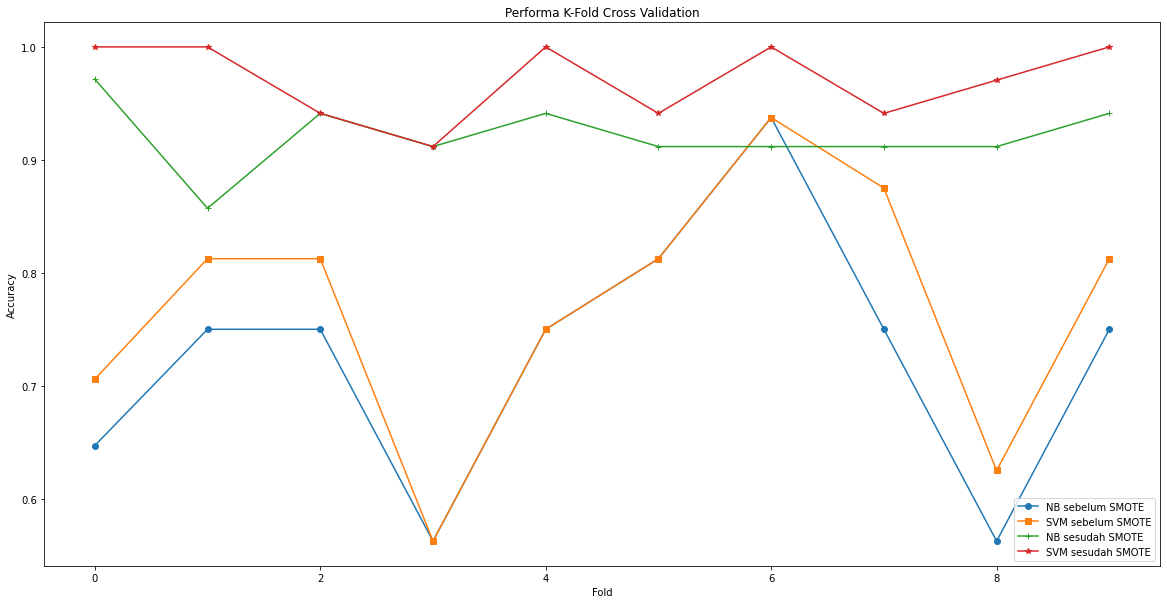

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Score_nb_before, marker='o')
plt.plot(Score_svm_before, marker='s')
plt.plot(Score_nb, marker='+')
plt.plot(Score_svm, marker='*')
plt.title('Performa K-Fold Cross Validation')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/perbandingan-plot.png')
plt.legend(['NB sebelum SMOTE', 'SVM sebelum SMOTE', 'NB sesudah SMOTE', 'SVM sesudah SMOTE'], loc='lower right')
plt.show()

In [ ]:
mean_nb_before = np.mean(Score_nb_before)
mean_svm_before = np.mean(Score_svm_before)
mean_nb = np.mean(Score_nb)
mean_svm = np.mean(Score_svm)

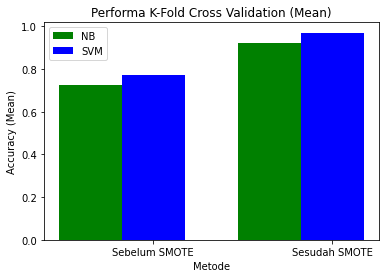

<Figure size 1080x720 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
nb = (mean_nb_before, mean_nb)
svm = (mean_svm_before, mean_svm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

bar1 = plt.bar(index, nb, bar_width,
color='g',
label='NB')

bar2 = plt.bar(index + bar_width, svm, bar_width,
color='b',
label='SVM')

plt.xlabel('Metode')
plt.ylabel('Accuracy (Mean)')
plt.title('Performa K-Fold Cross Validation (Mean)')
plt.xticks(index + bar_width, ('Sebelum SMOTE', 'Sesudah SMOTE'))
plt.legend()

plt.figure(figsize=(15,10))
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/perbandingan-bar.png')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
cv = KFold(n_splits=10, random_state=1, shuffle=True)
score_nb_before = cross_val_predict(pipeline_nb_before, x, y, cv=cv)
conf_mat = confusion_matrix(y, score_nb_before)
c_report = classification_report(y, score_nb_before)
print(conf_mat)
print(c_report)
pd.crosstab(y, score_nb_before, rownames=['True'], colnames=['Predicted'], margins=True)

[[114   0   0]
 [  8   0   1]
 [ 35   0   3]]
              precision    recall  f1-score   support

          C1       0.73      1.00      0.84       114
          C2       0.00      0.00      0.00         9
          C3       0.75      0.08      0.14        38

    accuracy                           0.73       161
   macro avg       0.49      0.36      0.33       161
weighted avg       0.69      0.73      0.63       161



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,C1,C3,All
True,,,
C1,114,0,114
C2,8,1,9
C3,35,3,38
All,157,4,161


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
cv = KFold(n_splits=10, random_state=1, shuffle=True)
score_svm_before = cross_val_predict(pipeline_svm_before, x, y, cv=cv)
conf_mat = confusion_matrix(y, score_svm_before)
c_report = classification_report(y, score_svm_before)
print(conf_mat)
print(c_report)
pd.crosstab(y, score_svm_before, rownames=['True'], colnames=['Predicted'], margins=True)

[[114   0   0]
 [  5   3   1]
 [ 31   0   7]]
              precision    recall  f1-score   support

          C1       0.76      1.00      0.86       114
          C2       1.00      0.33      0.50         9
          C3       0.88      0.18      0.30        38

    accuracy                           0.77       161
   macro avg       0.88      0.51      0.56       161
weighted avg       0.80      0.77      0.71       161



Predicted,C1,C2,C3,All
True,,,,
C1,114,0,0,114
C2,5,3,1,9
C3,31,0,7,38
All,150,3,8,161


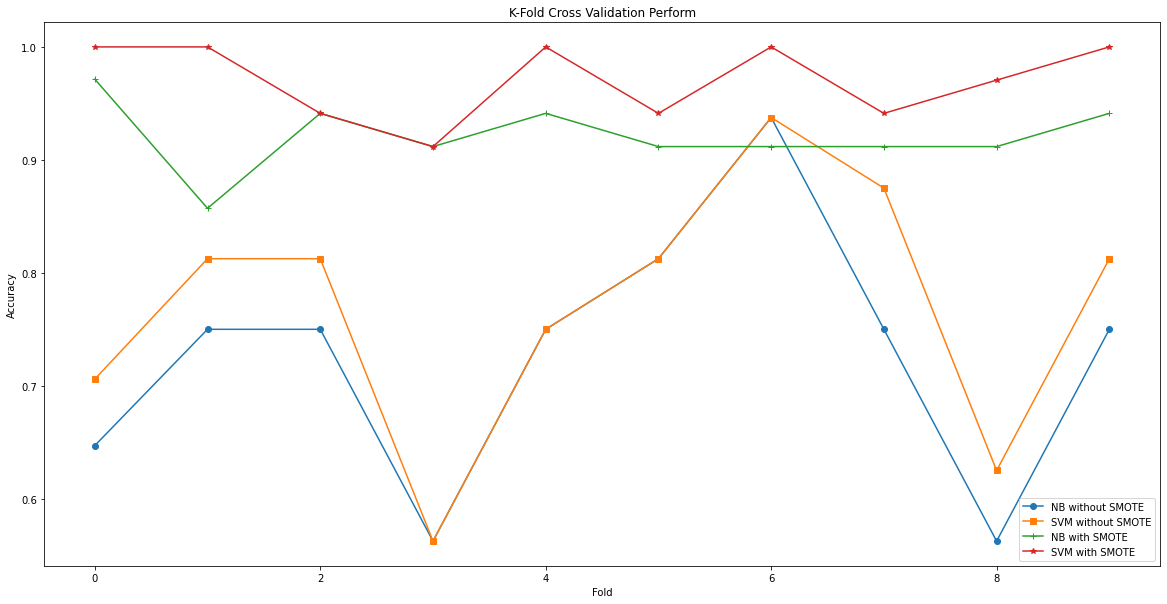

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Score_nb_before, marker='o')
plt.plot(Score_svm_before, marker='s')
plt.plot(Score_nb, marker='+')
plt.plot(Score_svm, marker='*')
plt.title('K-Fold Cross Validation Perform')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/perbandingan-plot-2.png')
plt.legend(['NB without SMOTE', 'SVM without SMOTE', 'NB with SMOTE', 'SVM with SMOTE'], loc='lower right')
plt.show()

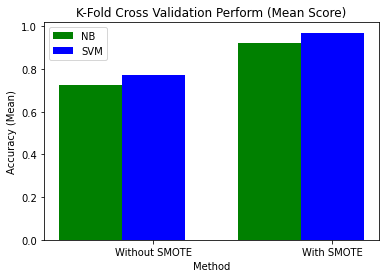

<Figure size 1080x720 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
nb = (mean_nb_before, mean_nb)
svm = (mean_svm_before, mean_svm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

bar1 = plt.bar(index, nb, bar_width,
color='g',
label='NB')

bar2 = plt.bar(index + bar_width, svm, bar_width,
color='b',
label='SVM')

plt.xlabel('Method')
plt.ylabel('Accuracy (Mean)')
plt.title('K-Fold Cross Validation Perform (Mean Score)')
plt.xticks(index + bar_width, ('Without SMOTE', 'With SMOTE'))
plt.legend()

plt.figure(figsize=(15,10))
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/perbandingan-bar.png')
plt.tight_layout()
plt.show()